In [2]:
from vpython import *
import ode
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## Relevent Background:
To begin with our project Michael and I first had to find the correct equations that we could implement into our code. We began by googling and found a website that had a simulation of a double pendulum with proper equations. The website was https://www.myphysicslab.com/pendulum/double-pendulum-en.html and from there we got our numerical equations. 

## Equations used:
$ \omega_1 $ = angular velocity <br>
$ \omega_2 $ = angular velocity <br>
$ \theta_1' = \omega_1 $ <br>
$ \theta_2' = \omega_2 $ <br>
$ \omega_1'= \frac{-g(2m_1 + m_2)sin(\theta_1 - 2\theta_2) - 2sin(\theta_1 - \theta_2)m_2(\omega_2^2L_2 + \omega_1^2L_1cos(\theta_1 - \theta_2))}{L_1(2m_1 + m_2 - m_2cos(2\theta_1 - 2\theta_2))} $ <br>
$\omega_2'=\frac{2sin(\theta_1-\theta_2)(\omega_1^2L_1(m_1 + m_2)+ g(m_1 + m_2)cos\theta_1 + \omega_2^2L_2m_2cos(\theta_1 - \theta_2))}{L_2(2m_1 + m_2 - m_2cos(2\theta_1 - 2\theta_2))} $ <br>

Both these equations are used for the Runge Kutta method.

## Question & Assumptions: 

Assumptions made were that this was closed system and that there was no friction in our system. This means that energy will be conserved and that there is no loss or gain of energy.

Our question we wanted to answer was: How does changing the lengths and/or masses of each ball effect the chaotic motion of the double pendulum since the chaotic motion is very sensitive to the inital conditions.

# Code:

In [3]:
def pendulum(dep, t):
    """ Calculate and return the derivative [d/dt, d^2/dt^2] evaluated as a function of y, dy/dt, and t
    where y is the dependent variable.
    
    Keyword arguments:
    t -- time at the beginning of the time step
    dep -- an array of the dependent variable and its derivative [y, dy/dt]_n at time t
    """    
    
    theta1 = dep[0]
    omega1 = dep[1]
    theta2 = dep[2]
    omega2 = dep[3]
   
    deriv = np.zeros(4)
    deriv[0] = omega1 #dtheta/dt
    A1 = -g*(2*m1+m2)*np.sin(theta1)-m2*g*np.sin(theta1-2*theta2)
    A2 = -2*np.sin(theta1-theta2)*m2*((omega2**2)*L2 + (omega1**2)*L1*np.cos(theta1-theta2))
    A3 = L1*(2*m1+ m2 - m2*np.cos(2*theta1 - 2*theta2))
    deriv[1] = (A1 + A2 )/ A3
    
    deriv[2] = omega2
    B1 = 2*np.sin(theta1-theta2)*((omega1**2)*L1*(m1+m2) +g*(m1+m2)*np.cos(theta1) + (omega2**2)*L2*m2*np.cos(theta1-theta2))
    B2 = L2*(2*m1 +m2 - m2*np.cos(2*theta1 - 2*theta2))
    deriv[3] = (B1 / B2)
    
    return deriv

g = 10
L1 = 4
L2 = 2
m1 = 4
m2 = 2


#dependent variables
theta1_0 = np.pi/2
theta2_0 = 0
omega1_0 = 0 #initial speed of theta1
omega2_0 = 0

data = np.array([theta1_0, omega1_0, theta2_0, omega2_0]) #initialize array to store dependent variables

#independent variable
t = 0
h = 1e-4
Nsteps = int(10/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t
tarr = np.zeros(Nsteps)
theta1arr = np.zeros(Nsteps)
theta2arr = np.zeros(Nsteps)

omega1arr = np.zeros(Nsteps)
omega2arr = np.zeros(Nsteps)

tarr[0] = t
theta1arr[0] = theta1_0
theta2arr[0] = theta2_0

omega1arr[0] = omega1_0
omega2arr[0] = omega2_0

#create a time evolution loop

for n in range(1,Nsteps):
    
    data = ode.RK4(pendulum, data, t, h)
  
    t = t + h
    
    tarr[n] = t
    theta1arr[n] = data[0]
    omega1arr[n] = data[1]
    theta2arr[n] = data[2]
    omega2arr[n] = data[3]
    
    

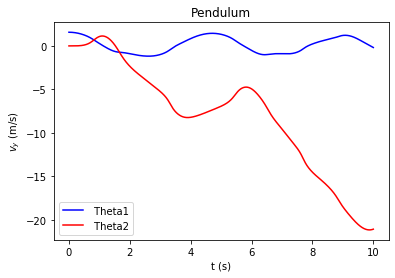

In [4]:
fig = plt.figure()
plt.title("Pendulum")
plt.plot(tarr, theta1arr,'b-', label=' Theta1')
plt.plot(tarr, theta2arr,'r-', label=' Theta2')
plt.xlabel('t (s)')
plt.ylabel('$v_y$ (m/s)')
plt.legend()
plt.show()


### Example 1: 
$ L_1 = 4m, L_2 = 2m, m_1 = 4kg, m_2 = 2kg $ <br>
This first example was set as a sort of control to our program and we used it to compare the rest of the examples. This is because the system itself is not very chaotic and the initial conditions are fairly similar to each other.

In [6]:
scene = canvas(title=" Double Pendulum")


x1array = L1*np.sin(theta1arr)
y1array = -L1*np.cos(theta1arr)


x2array = x1array + L2*np.sin(theta2arr)
y2array = y1array - L2*np.cos(theta2arr)


ball1 = sphere(pos = vec(x1array[0],y1array[0],0), radius = L1*.10, make_trail = True)
rod1 = cylinder(pos = vec(0,0,0),radius = L1*.025, axis = ball1.pos)

ball2 = sphere(pos = vec(x2array[0],y2array[0],0), radius = L2*.10, make_trail = True, color = color.red)
rod2 = cylinder(pos = ball1.pos ,radius = L2*.025, axis = ball2.pos - ball1.pos)


scene.pause()

for n in range(1,Nsteps):
    rate(10000)
    ball1.pos = vec(x1array[n],y1array[n],0)
    rod1.axis = ball1.pos
    
    ball2.pos = vec(x2array[n],y2array[n],0)
    rod2.pos = ball1.pos
    rod2.axis = ball2.pos - ball1.pos
    


<IPython.core.display.Javascript object>

### Example 2:
$ L1 = 10m, L2 = 2m, m_1 = 4kg, m_2 = 10kg $ <br>
In this example making the first rod much longer than the second rod allows for not much of a chaotic behaviir for the tracking of the first ball. However, making the second balls mass much larger than the second allows for the second ball to have a much larger velocity and more chaotic behaviour in the graph.

In [8]:
g = 10
L1 = 10
L2 = 2
m1 = 4
m2 = 10


#dependent variables
theta1_0 = np.pi/2
theta2_0 = 0
omega1_0 = 0 #initial speed of theta1
omega2_0 = 0

data = np.array([theta1_0, omega1_0, theta2_0, omega2_0]) #initialize array to store dependent variables

#independent variable
t = 0
h = 1e-4
Nsteps = int(10/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t
tarr = np.zeros(Nsteps)
theta1arr = np.zeros(Nsteps)
theta2arr = np.zeros(Nsteps)

omega1arr = np.zeros(Nsteps)
omega2arr = np.zeros(Nsteps)

tarr[0] = t
theta1arr[0] = theta1_0
theta2arr[0] = theta2_0

omega1arr[0] = omega1_0
omega2arr[0] = omega2_0

#create a time evolution loop

for n in range(1,Nsteps):
    
    data = ode.RK4(pendulum, data, t, h)
  
    t = t + h
    
    tarr[n] = t
    theta1arr[n] = data[0]
    omega1arr[n] = data[1]
    theta2arr[n] = data[2]
    omega2arr[n] = data[3]

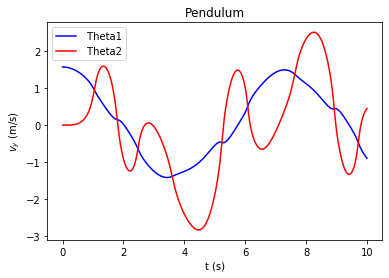

In [9]:
fig = plt.figure()
plt.title("Pendulum")
plt.plot(tarr, theta1arr,'b-', label=' Theta1')
plt.plot(tarr, theta2arr,'r-', label=' Theta2')
plt.xlabel('t (s)')
plt.ylabel('$v_y$ (m/s)')
plt.legend()
plt.show()

In [22]:
scene = canvas(title="Double Pendulum")


x1array = L1*np.sin(theta1arr)
y1array = -L1*np.cos(theta1arr)


x2array = x1array + L2*np.sin(theta2arr)
y2array = y1array - L2*np.cos(theta2arr)


ball1 = sphere(pos = vec(x1array[0],y1array[0],0), radius = L1/40, make_trail = True)
rod1 = cylinder(pos = vec(0,0,0),radius = L1*.010, axis = ball1.pos)

ball2 = sphere(pos = vec(x2array[0],y2array[0],0), radius = L2*.20, make_trail = True, color = color.red)
rod2 = cylinder(pos = ball1.pos ,radius = L2*.025, axis = ball2.pos - ball1.pos)


scene.pause()

for n in range(1,Nsteps):
    rate(10000)
    ball1.pos = vec(x1array[n],y1array[n],0)
    rod1.axis = ball1.pos
    
    ball2.pos = vec(x2array[n],y2array[n],0)
    rod2.pos = ball1.pos
    rod2.axis = ball2.pos - ball1.pos

<IPython.core.display.Javascript object>

### Example 3: 
$ L_1 = 2m, L_2 = 10m, m_1 = 10kg, m_2 = 4kg $ <br>
Reversing the data from the previous example causes the system to be anything but chaotic and exhibits very predictable behavoir. This is especially seen in the graph. 

In [24]:
g = 10
L1 = 2
L2 = 10
m1 = 10
m2 = 4


#dependent variables
theta1_0 = np.pi/2
theta2_0 = 0
omega1_0 = 0 #initial speed of theta1
omega2_0 = 0

data = np.array([theta1_0, omega1_0, theta2_0, omega2_0]) #initialize array to store dependent variables

#independent variable
t = 0
h = 1e-4
Nsteps = int(10/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t
tarr = np.zeros(Nsteps)
theta1arr = np.zeros(Nsteps)
theta2arr = np.zeros(Nsteps)

omega1arr = np.zeros(Nsteps)
omega2arr = np.zeros(Nsteps)

tarr[0] = t
theta1arr[0] = theta1_0
theta2arr[0] = theta2_0

omega1arr[0] = omega1_0
omega2arr[0] = omega2_0

#create a time evolution loop

for n in range(1,Nsteps):
    
    data = ode.RK4(pendulum, data, t, h)
  
    t = t + h
    
    tarr[n] = t
    theta1arr[n] = data[0]
    omega1arr[n] = data[1]
    theta2arr[n] = data[2]
    omega2arr[n] = data[3]

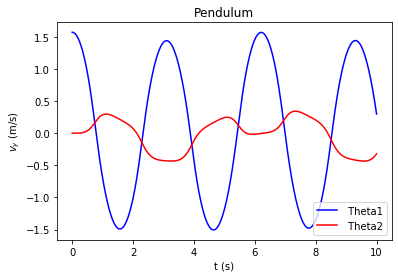

In [25]:
fig = plt.figure()
plt.title("Pendulum")
plt.plot(tarr, theta1arr,'b-', label=' Theta1')
plt.plot(tarr, theta2arr,'r-', label=' Theta2')
plt.xlabel('t (s)')
plt.ylabel('$v_y$ (m/s)')
plt.legend()
plt.show()

In [30]:
scene = canvas(title="Double Pendulum")


x1array = L1*np.sin(theta1arr)
y1array = -L1*np.cos(theta1arr)


x2array = x1array + L2*np.sin(theta2arr)
y2array = y1array - L2*np.cos(theta2arr)


ball1 = sphere(pos = vec(x1array[0],y1array[0],0), radius = L1*.30, make_trail = True)
rod1 = cylinder(pos = vec(0,0,0),radius = L1*.025, axis = ball1.pos)

ball2 = sphere(pos = vec(x2array[0],y2array[0],0), radius = L2/30, make_trail = True, color = color.red)
rod2 = cylinder(pos = ball1.pos ,radius = L2*.010, axis = ball2.pos - ball1.pos)


scene.pause()

for n in range(1,Nsteps):
    rate(10000)
    ball1.pos = vec(x1array[n],y1array[n],0)
    rod1.axis = ball1.pos
    
    ball2.pos = vec(x2array[n],y2array[n],0)
    rod2.pos = ball1.pos
    rod2.axis = ball2.pos - ball1.pos

<IPython.core.display.Javascript object>

## Validation: 
To validate that our program works and that there are no errors in the code, the best thing to do would allow our program to run for a large amount of time to test it's limits. This can be seen below in the program using our data from Example #1. However, if there errors they will most likely be numerical for the calculations to update $\theta$ and $\omega$. This program below shows a very accurate depiction of chaotic motion which tells us that our program is accurate and reliable. <p><img src="https://upload.wikimedia.org/wikipedia/commons/7/77/DPLE.jpg" alt="Alt Text" title="Long Exposure of a Double Pendulum using LED tracking "></p>

In [31]:
g = 10
L1 = 4
L2 = 2
m1 = 4
m2 = 2


#dependent variables
theta1_0 = np.pi/2
theta2_0 = 0
omega1_0 = 0 #initial speed of theta1
omega2_0 = 0

data = np.array([theta1_0, omega1_0, theta2_0, omega2_0]) #initialize array to store dependent variables

#independent variable
t = 0
h = 1e-4
Nsteps = int(50/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t
tarr = np.zeros(Nsteps)
theta1arr = np.zeros(Nsteps)
theta2arr = np.zeros(Nsteps)

omega1arr = np.zeros(Nsteps)
omega2arr = np.zeros(Nsteps)

tarr[0] = t
theta1arr[0] = theta1_0
theta2arr[0] = theta2_0

omega1arr[0] = omega1_0
omega2arr[0] = omega2_0

#create a time evolution loop

for n in range(1,Nsteps):
    
    data = ode.RK4(pendulum, data, t, h)
  
    t = t + h
    
    tarr[n] = t
    theta1arr[n] = data[0]
    omega1arr[n] = data[1]
    theta2arr[n] = data[2]
    omega2arr[n] = data[3]

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


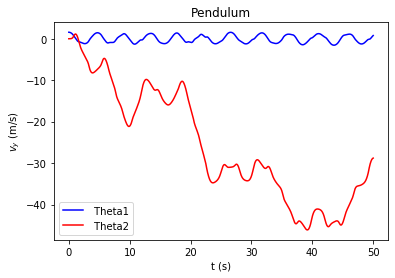

In [32]:
fig = plt.figure()
plt.title("Pendulum")
plt.plot(tarr, theta1arr,'b-', label=' Theta1')
plt.plot(tarr, theta2arr,'r-', label=' Theta2')
plt.xlabel('t (s)')
plt.ylabel('$v_y$ (m/s)')
plt.legend()
plt.show()

In [34]:
scene = canvas(title="Double Pendulum")


x1array = L1*np.sin(theta1arr)
y1array = -L1*np.cos(theta1arr)


x2array = x1array + L2*np.sin(theta2arr)
y2array = y1array - L2*np.cos(theta2arr)


ball1 = sphere(pos = vec(x1array[0],y1array[0],0), radius = L1*.10, make_trail = True)
rod1 = cylinder(pos = vec(0,0,0),radius = L1*.025, axis = ball1.pos)

ball2 = sphere(pos = vec(x2array[0],y2array[0],0), radius = L2*.10, make_trail = True, color = color.red)
rod2 = cylinder(pos = ball1.pos ,radius = L2*.025, axis = ball2.pos - ball1.pos)


scene.pause()

for n in range(1,Nsteps):
    rate(10000)
    ball1.pos = vec(x1array[n],y1array[n],0)
    rod1.axis = ball1.pos
    
    ball2.pos = vec(x2array[n],y2array[n],0)
    rod2.pos = ball1.pos
    rod2.axis = ball2.pos - ball1.pos

<IPython.core.display.Javascript object>